In [19]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
# import the data
file_path = "C:/Users/DELL/Downloads/Absenteeism-data.csv"
raw_csv_data = pd.read_csv(file_path)

In [4]:
# make a copy of data
df = raw_csv_data.copy()
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [7]:
# display all the rows and columns to eyeball the data
pd.options.display.max_columns = None;
pd.options.display.max_rows = None;

In [21]:
# now display the data
# display(df)   # this code will display all rows and columns

In [12]:
# Data cleaning
# convert the Date to Datetime
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%y")

In [13]:
# handle the missing values
df['Reason for Absence'] = df['Reason for Absence'].replace(0, np.nan)

In [15]:
df['Reason for Absence'] = df['Reason for Absence'].fillna(df['Reason for Absence'].mode()[0])

In [16]:
# Detect and handle the outliers in Absenteeism time in Hour
# Identify potential outliers using IQR
Q1 = df['Absenteeism Time in Hours'].quantile(0.25)
Q3 = df['Absenteeism Time in Hours'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers at the upper bound
df['Absenteeism Time in Hours'] = np.where(df['Absenteeism Time in Hours'] > upper_bound, upper_bound, 
                                           df['Absenteeism Time in Hours'])

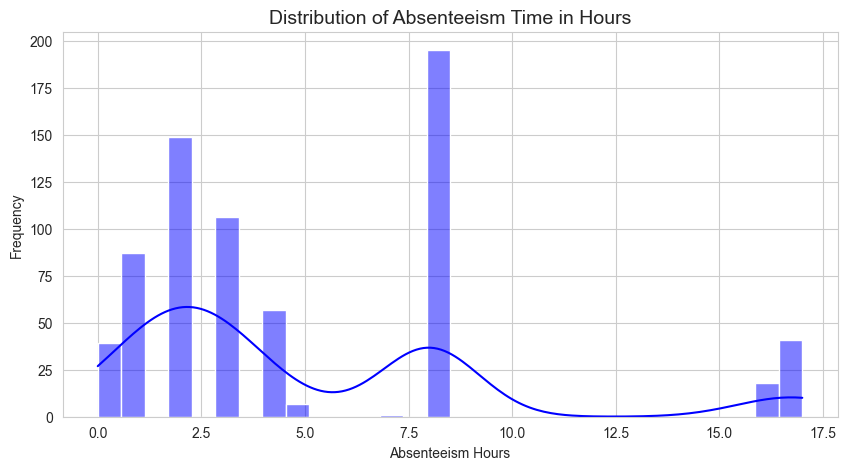

In [20]:
# set style
sns.set_style("whitegrid")

# Plot absenteeism hours distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Absenteeism Time in Hours'], bins=30, kde=True, color='blue')
plt.title("Distribution of Absenteeism Time in Hours", fontsize=14)
plt.xlabel("Absenteeism Hours")
plt.ylabel("Frequency")
plt.show()


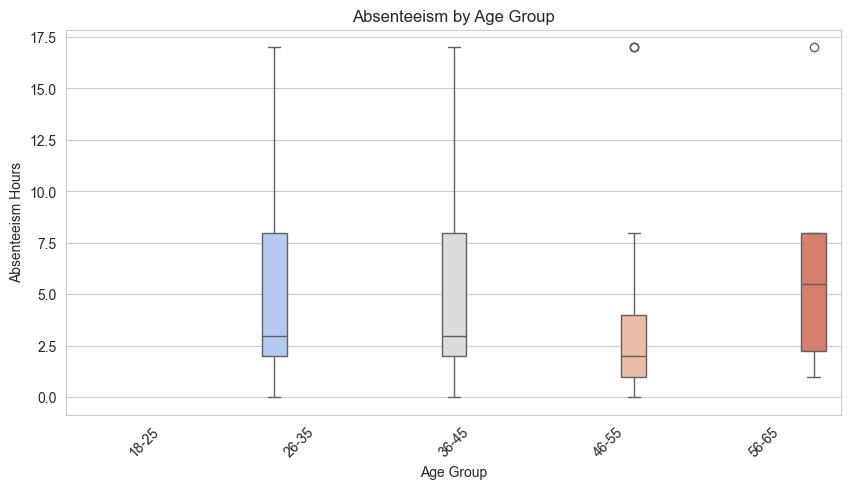

In [25]:
# Absenteeism by aga group

# Bin ages into categories
df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])

# Create the boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age Group'], y=df['Absenteeism Time in Hours'], hue=df['Age Group'], palette="coolwarm", legend=False)
plt.title("Absenteeism by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Absenteeism Hours")
plt.xticks(rotation=45)
plt.show()


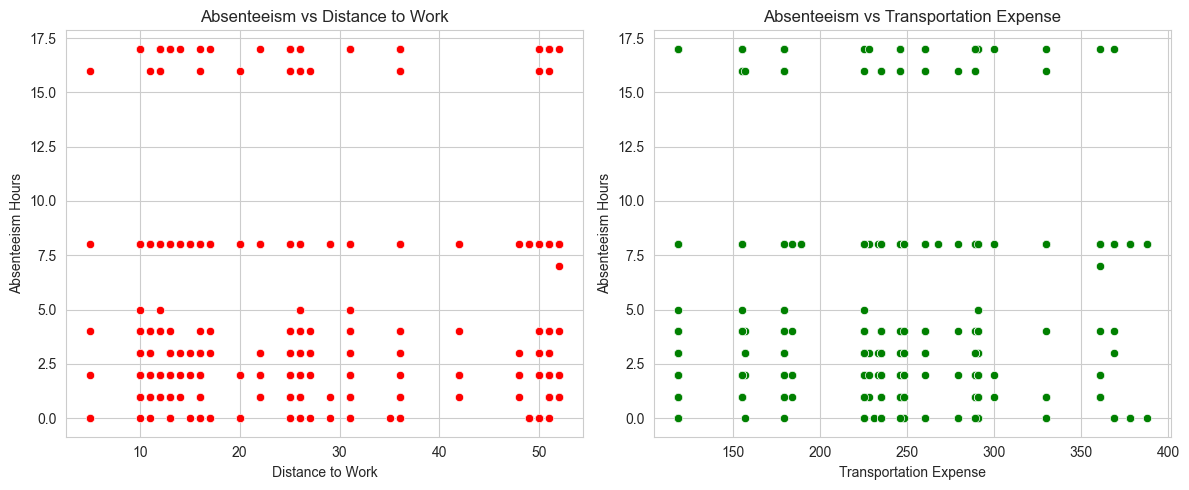

In [26]:
# Absenteeism VS distance to work
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Distance to Work vs Absenteeism
sns.scatterplot(x=df['Distance to Work'], y=df['Absenteeism Time in Hours'], ax=axes[0], color="red")
axes[0].set_title("Absenteeism vs Distance to Work")
axes[0].set_xlabel("Distance to Work")
axes[0].set_ylabel("Absenteeism Hours")

# Scatter plot for Transportation Expense vs Absenteeism
sns.scatterplot(x=df['Transportation Expense'], y=df['Absenteeism Time in Hours'], ax=axes[1], color="green")
axes[1].set_title("Absenteeism vs Transportation Expense")
axes[1].set_xlabel("Transportation Expense")
axes[1].set_ylabel("Absenteeism Hours")

plt.tight_layout()
plt.show()


In [27]:
# various questions that we can answer are as follows
# Ques-1) What is the average absenteeism time per employee
avg_absenteeism_per_employee = df.groupby("ID")["Absenteeism Time in Hours"].mean()
print(avg_absenteeism_per_employee.head())  

ID
1    5.318182
2    5.000000
3    3.946903
5    5.555556
6    8.000000
Name: Absenteeism Time in Hours, dtype: float64


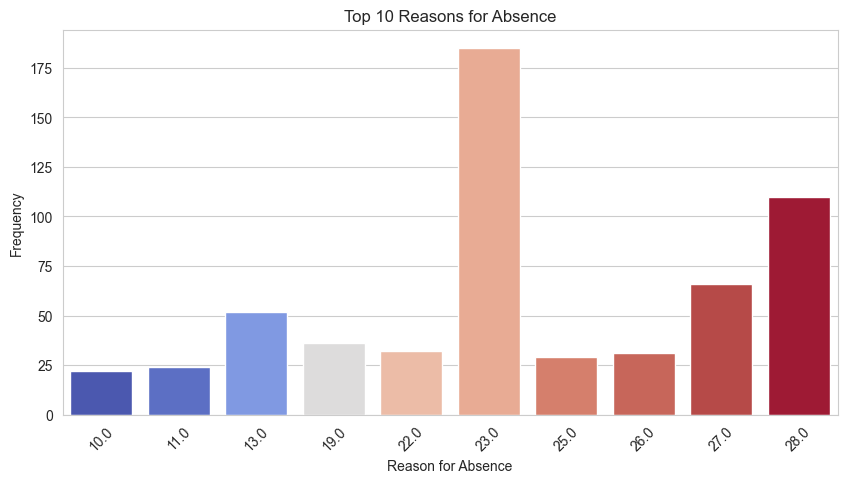

In [29]:
# Ques-2) What are the most common reasons for absence
plt.figure(figsize=(10, 5))
sns.barplot(
    x=reason_counts.index,
    y=reason_counts.values,
    hue=reason_counts.index,  
    palette="coolwarm",
    legend=False  
)
plt.title("Top 10 Reasons for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.show()

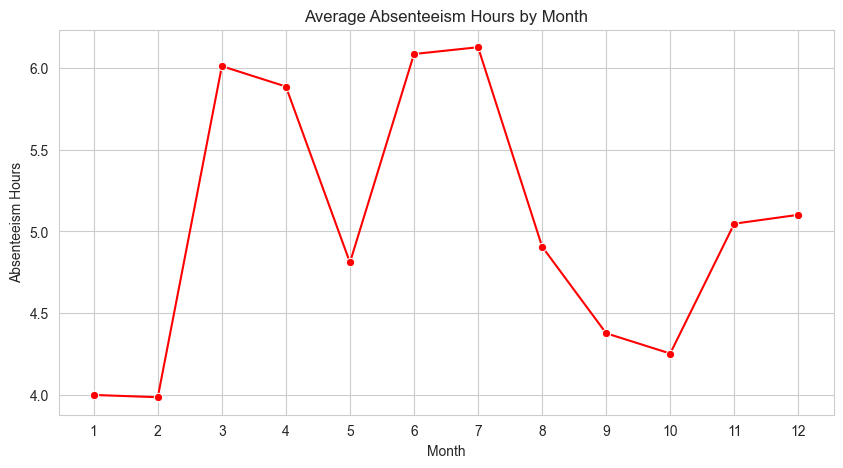

In [30]:
# Ques-3) Are there seasonal trends in absenteeism?
df["Month"] = df["Date"].dt.month  # extract month value
monthly_absenteeism = df.groupby("Month")["Absenteeism Time in Hours"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_absenteeism.index, y=monthly_absenteeism.values, marker="o", color="red")
plt.title("Average Absenteeism Hours by Month")
plt.xlabel("Month")
plt.ylabel("Absenteeism Hours")
plt.xticks(range(1, 13))
plt.show()

In [31]:
# Ques-4) Which employees have highest absenteeism hours
top_absentees = df.groupby("ID")["Absenteeism Time in Hours"].sum().sort_values(ascending=False).head(10)
print(top_absentees)

ID
3     446.0
11    319.0
20    244.0
28    243.0
24    218.0
14    217.0
34    213.0
22    187.0
15    167.0
10    147.0
Name: Absenteeism Time in Hours, dtype: float64


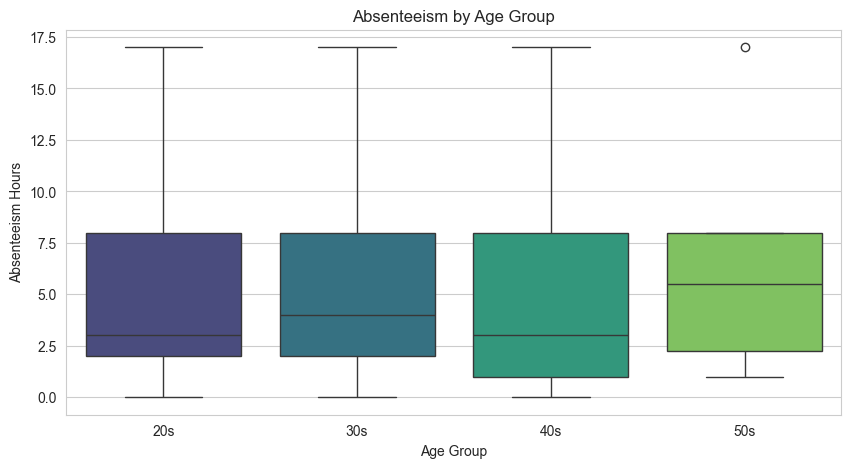

In [37]:
# Ques-4) Does absenteeism vary by age group?
df["Age Group"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60], labels=["20s", "30s", "40s", "50s"])

plt.figure(figsize=(10, 5))
sns.boxplot(
    x="Age Group",
    y="Absenteeism Time in Hours",
    data=df,
    hue="Age Group",  
    palette="viridis",
    legend=False  
)
plt.title("Absenteeism by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Absenteeism Hours")
plt.show()



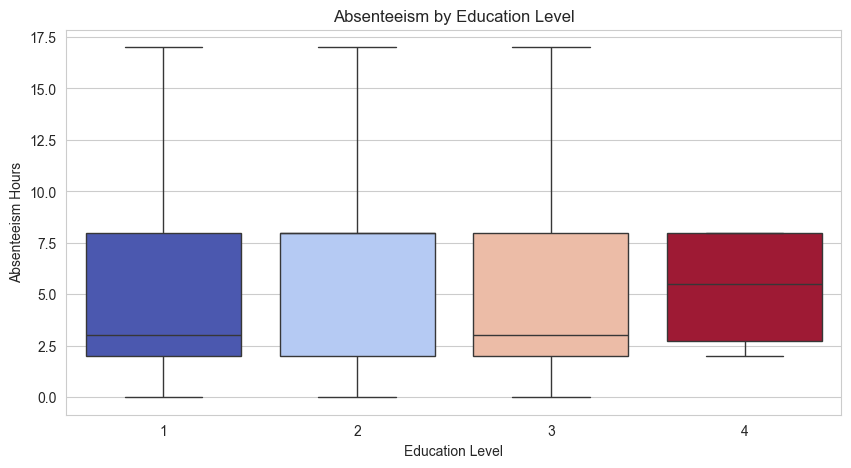

In [36]:
# Ques-5) Does education level affect absenteeism?
plt.figure(figsize=(10, 5))
sns.boxplot(
    x="Education",
    y="Absenteeism Time in Hours",
    data=df,
    hue="Education",  # Assign x variable to hue
    palette="coolwarm",
    legend=False  # Hide unnecessary legend
)
plt.title("Absenteeism by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Absenteeism Hours")
plt.show()


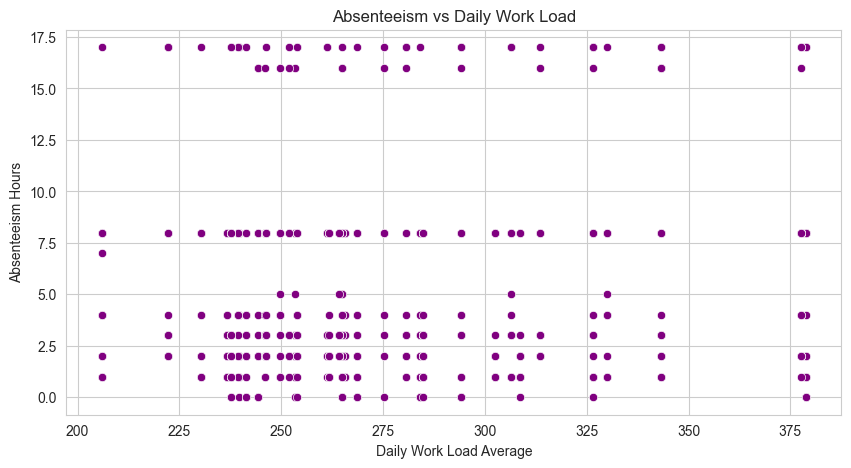

In [35]:
# Ques-6) Is there a correlation between daily workload and absenteeism?
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Daily Work Load Average"], y=df["Absenteeism Time in Hours"], color="purple")
plt.title("Absenteeism vs Daily Work Load")
plt.xlabel("Daily Work Load Average")
plt.ylabel("Absenteeism Hours")
plt.show()